### Model Building

In [230]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler

In [231]:
df = pd.read_csv("pubchem_best.csv")

In [232]:
df.head()

,PubchemFP0,PubchemFP2,PubchemFP3,PubchemFP6,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,...,PubchemFP839,PubchemFP840,PubchemFP842,PubchemFP860,PubchemFP862,PubchemFP863,PubchemFP866,Name,label,pIC50
0,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,CHEMBL370039,0,4.067019
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,CHEMBL3774737,1,8.920819
2,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,0,CHEMBL1597831,1,6.017729
3,1,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,CHEMBL1455849,1,6.920819
4,0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,CHEMBL3936897,1,6.075721


In [233]:
X = df.drop(["Name","label","pIC50"],axis=1)
y= df.label

In [234]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [235]:
rf = RandomForestClassifier(random_state=42)

In [236]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [237]:
y_pred = rf.predict(X_test)

In [238]:
from sklearn.metrics import classification_report

In [239]:
classificationreport= classification_report(y_test,y_pred,labels=rf.classes_)

In [240]:
print(classificationreport)

              precision    recall  f1-score   support

           0       0.81      0.61      0.69       109
           1       0.89      0.96      0.92       359

    accuracy                           0.88       468
   macro avg       0.85      0.78      0.81       468
weighted avg       0.87      0.88      0.87       468



In [241]:
y_train.value_counts()

1    867
0    224
Name: label, dtype: int64

+ ### This is an imbalanced dataset. This is why recall and f1-score are low.

In [242]:
from imblearn.over_sampling import SMOTE

In [243]:
smt = SMOTE(sampling_strategy="minority",k_neighbors=16,random_state=42)

In [244]:
X_tr, y_tr = smt.fit_resample(X_train,y_train)

In [245]:
rf = RandomForestClassifier(random_state=42)

In [246]:
rf.fit(X_tr,y_tr)

RandomForestClassifier(random_state=42)

In [247]:
y_pred = rf.predict(X_test)

In [248]:
classificationreport= classification_report(y_test,y_pred,labels=rf.classes_)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.81      0.71      0.75       109
           1       0.91      0.95      0.93       359

    accuracy                           0.89       468
   macro avg       0.86      0.83      0.84       468
weighted avg       0.89      0.89      0.89       468



In [249]:
import pickle

In [250]:
with open('rf_model', 'wb') as files:
    pickle.dump(rf, files)

In [251]:
###with open('rf_model_pkl' , 'rb') as f:
   ### rf = pickle.load(f)

+ ### This is better than previous model

In [177]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [178]:
cm = confusion_matrix(y_test,y_pred,labels=rf.classes_)

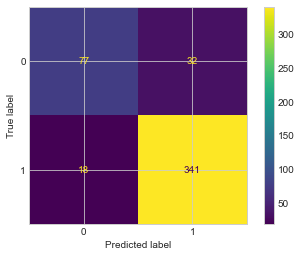

In [179]:
display = ConfusionMatrixDisplay(cm,display_labels=rf.classes_)
display.plot()

In [180]:
precision_score(y_test,y_pred,pos_label=1)

0.9142091152815014

In [181]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

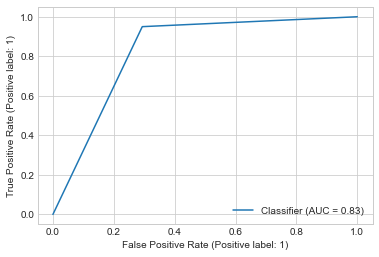

In [182]:
RocCurveDisplay.from_predictions(y_test,y_pred)

### Applicability domain Using PCA bounding box

In [183]:
train = X_train
test = X_test

In [184]:
train["model"] = "Train"
test["model"] = "Test"

In [185]:
pca = pd.concat([train,test],axis=0)


In [186]:
pca.reset_index(drop=True,inplace=True)

In [187]:
pca.head()

,PubchemFP0,PubchemFP2,PubchemFP3,PubchemFP6,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,...,PubchemFP824,PubchemFP825,PubchemFP839,PubchemFP840,PubchemFP842,PubchemFP860,PubchemFP862,PubchemFP863,PubchemFP866,model
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Train
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train


In [188]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the Figures Inline
%matplotlib inline
from sklearn.decomposition import PCA
import numpy as np

In [189]:
data_pca = pca

In [190]:
x= data_pca.drop("model",axis=1).values.astype(np.float)

/var/folders/ng/whnp3t611lq2k8dzf4hzhtnw0000gn/T/ipykernel_25424/4076026006.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x= data_pca.drop("model",axis=1).values.astype(np.float)


In [191]:
y = data_pca["model"].values

In [192]:
pca = PCA(n_components=2)

In [193]:
pca_ = pca.fit_transform(X)

In [194]:
pca_df = pd.DataFrame(pca_,columns=["PC1","PC2"])
pca_df = pd.concat([pca_df,pd.DataFrame(y)],axis=1)

In [195]:
pca_df

,PC1,PC2,0
0,-1.702853,1.814346,Train
1,-0.610722,-0.300549,Train
2,3.600373,0.238102,Train
3,-0.605954,0.057525,Train
4,3.609363,0.567818,Train
...,...,...,...
1554,5.004346,-0.424425,Test
1555,-2.420519,1.920387,Test
1556,-2.625103,0.084887,Test
1557,-1.630105,-0.681611,Test


In [196]:
pca_df.rename(columns={0:"Name"},inplace=True)

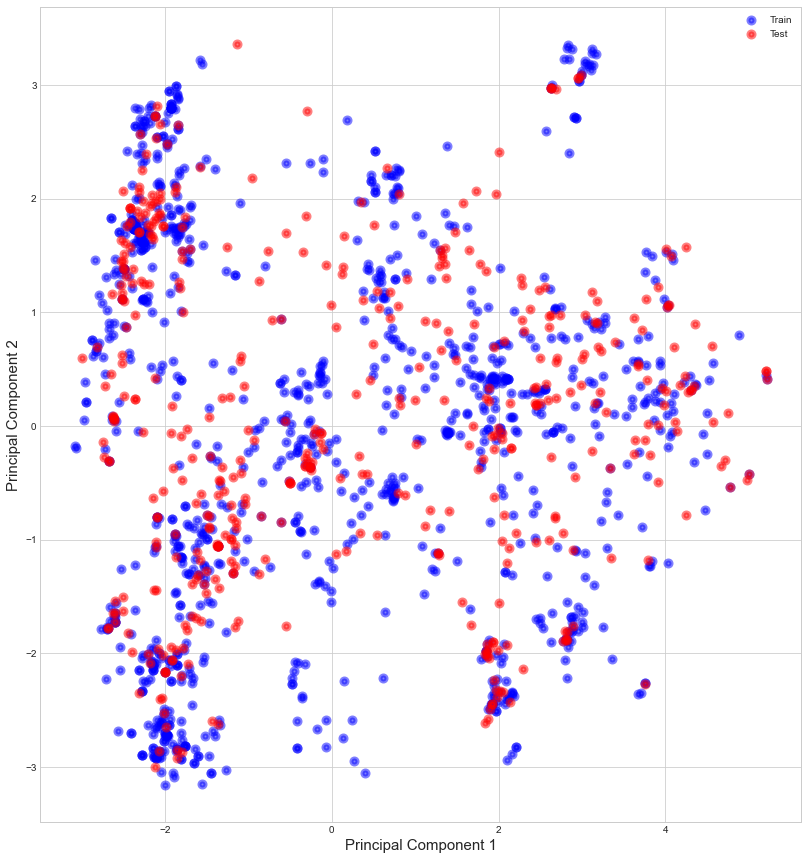

In [197]:
import matplotlib.pylab as plt
fig = plt.figure(2,figsize = (30,15))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

targets = ["Train","Test"]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indexes = pca_df['Name'] == target
    ax.scatter(pca_df.loc[indexes, 'PC1']
               , pca_df.loc[indexes, 'PC2']
               , c = color
               ,lw = 4
               ,alpha= 0.5
               )
ax.legend(targets)

In [198]:
feat_imp = rf.feature_importances_
feat_imp

array([4.68895087e-03, 7.95276758e-03, 2.34037222e-03, 0.00000000e+00,
       6.47148704e-03, 2.76033687e-03, 7.71683257e-03, 1.49526774e-03,
       1.05552924e-03, 3.35457215e-04, 6.70774568e-04, 8.49979642e-03,
       1.23177600e-03, 2.45576166e-04, 1.48824348e-02, 3.89593768e-03,
       7.75673719e-04, 3.02289239e-05, 5.63763340e-04, 4.60512358e-03,
       5.81463962e-03, 2.81661036e-04, 1.14624232e-03, 1.88744633e-04,
       8.53356911e-05, 7.97935604e-05, 4.18262699e-07, 1.99996454e-03,
       3.70797943e-04, 3.56868662e-04, 6.06226125e-03, 4.13765349e-03,
       6.06511848e-03, 9.98222017e-04, 3.78278500e-04, 7.94173336e-04,
       2.22685752e-03, 2.52638687e-04, 1.50622213e-03, 3.07772012e-03,
       9.99525156e-05, 9.94107247e-04, 4.15160458e-05, 8.23717518e-04,
       0.00000000e+00, 2.55748171e-04, 8.78747541e-04, 3.49569083e-03,
       4.90294378e-03, 1.93659756e-03, 8.35844272e-03, 1.30538638e-02,
       4.24835979e-03, 1.56289993e-02, 4.92903593e-04, 1.99603718e-03,
      

In [199]:
rf_imp = pd.Series(rf.feature_importances_,index=X.columns)
rf_imp

PubchemFP0      0.004689
PubchemFP2      0.007953
PubchemFP3      0.002340
PubchemFP6      0.000000
PubchemFP12     0.006471
                  ...   
PubchemFP842    0.000075
PubchemFP860    0.004954
PubchemFP862    0.000255
PubchemFP863    0.000049
PubchemFP866    0.000082
Length: 355, dtype: float64

In [203]:
##Showing 20 most important features
head = rf_imp.sort_values(ascending=False).head(50)

In [204]:
head

PubchemFP420    0.022881
PubchemFP777    0.022519
PubchemFP308    0.018855
PubchemFP697    0.018796
PubchemFP623    0.018362
PubchemFP590    0.015903
PubchemFP186    0.015629
PubchemFP696    0.015608
PubchemFP23     0.014882
PubchemFP184    0.013054
PubchemFP258    0.012772
PubchemFP735    0.011958
PubchemFP380    0.011423
PubchemFP193    0.011135
PubchemFP259    0.010185
PubchemFP671    0.010176
PubchemFP382    0.009771
PubchemFP374    0.009598
PubchemFP405    0.009028
PubchemFP489    0.008997
PubchemFP672    0.008821
PubchemFP20     0.008500
PubchemFP183    0.008358
PubchemFP699    0.008246
PubchemFP2      0.007953
PubchemFP375    0.007821
PubchemFP453    0.007777
PubchemFP15     0.007717
PubchemFP452    0.007572
PubchemFP700    0.007475
PubchemFP797    0.007475
PubchemFP682    0.007449
PubchemFP567    0.007424
PubchemFP692    0.007346
PubchemFP712    0.007345
PubchemFP535    0.007306
PubchemFP412    0.007303
PubchemFP614    0.007235
PubchemFP693    0.007116
PubchemFP418    0.006964


<AxesSubplot:>

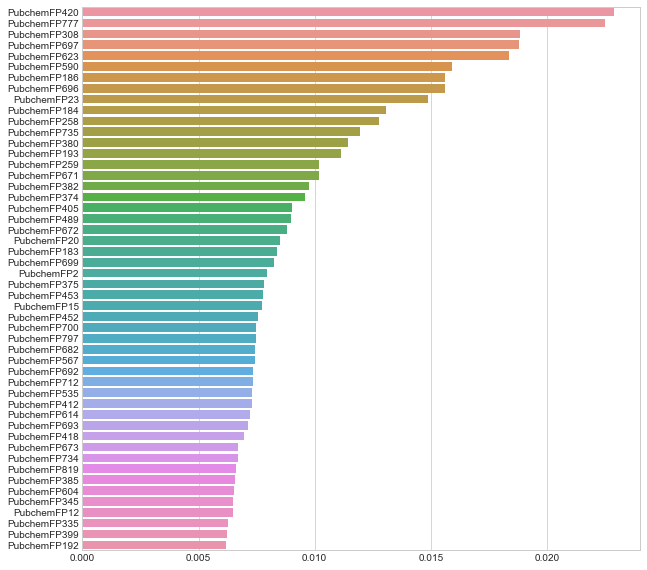

In [205]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(x=head.values,y=head.index)

In [252]:
## Virtual Screening

In [253]:
import glob
xml_files = glob.glob("*.xml")
xml_files.sort()
xml_files

['AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter.xml',
 'ExtendedFingerprinter.xml',
 'Fingerprinter.xml',
 'GraphOnlyFingerprinter.xml',
 'MACCSFingerprinter.xml',
 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter.xml']

In [257]:
FP_list = [
 'AtomPairs2DFingerprintCount',
 'AtomPairs2DFingerprinter',
 'EStateFingerprinter',
 'ExtendedFingerprinter',
 'Fingerprinter',
 'GraphOnlyFingerprinter',
 'MACCSFingerprinter',
 'PubchemFingerprinter',
 'SubstructureFingerprintCount',
 'SubstructureFingerprinter']

In [258]:
Padel_Fp = dict(zip(FP_list,xml_files))

In [259]:
Padel_Fp

{'AtomPairs2DFingerprintCount': 'AtomPairs2DFingerprintCount.xml',
 'AtomPairs2DFingerprinter': 'AtomPairs2DFingerprinter.xml',
 'EStateFingerprinter': 'EStateFingerprinter.xml',
 'ExtendedFingerprinter': 'ExtendedFingerprinter.xml',
 'Fingerprinter': 'Fingerprinter.xml',
 'GraphOnlyFingerprinter': 'GraphOnlyFingerprinter.xml',
 'MACCSFingerprinter': 'MACCSFingerprinter.xml',
 'PubchemFingerprinter': 'PubchemFingerprinter.xml',
 'SubstructureFingerprintCount': 'SubstructureFingerprintCount.xml',
 'SubstructureFingerprinter': 'SubstructureFingerprinter.xml'}

In [260]:
from padelpy import padeldescriptor
padeldescriptor(mol_dir='fda.smi', 
                d_file="fda_fp.csv", 
                descriptortypes= 'PubchemFingerprinter.xml',
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

In [261]:
fda = pd.read_csv("fda_fp.csv")

In [262]:
fda.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,ZINC000001530427,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ZINC000000120286,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ZINC000000008492,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ZINC000001612996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ZINC000003918087,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
fda_x = fda[df.drop(["label","pIC50","Name"],axis=1).columns]

In [269]:
fda_x

,PubchemFP0,PubchemFP2,PubchemFP3,PubchemFP6,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,...,PubchemFP821,PubchemFP824,PubchemFP825,PubchemFP839,PubchemFP840,PubchemFP842,PubchemFP860,PubchemFP862,PubchemFP863,PubchemFP866
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
317,1,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
318,1,1,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [270]:
fda_predict = rf.predict(fda_x.values)

/Users/sherifelsabbagh/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [271]:
fda_predict

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

In [272]:
fda_predict = pd.DataFrame(fda_predict,columns=["Label"])

In [273]:
fda_predict["molname"] = fda["Name"]

In [274]:
fda_predict

,Label,molname
0,0,ZINC000001530427
1,0,ZINC000000120286
2,1,ZINC000000008492
3,0,ZINC000001612996
4,0,ZINC000003918087
...,...,...
316,1,ZINC000100071256
317,0,ZINC000085534336
318,1,ZINC000254134439
319,1,ZINC000043450324


In [275]:
fda_active = fda_predict[fda_predict["Label"] == 1]

In [277]:
fda_active.reset_index(drop=True,inplace=True)

In [278]:
fda_active

,Label,molname
0,1,ZINC000000008492
1,1,ZINC000000896546
2,1,ZINC000242548690
3,1,ZINC000004658290
4,1,ZINC000003831405
...,...,...
175,1,ZINC000100037855
176,1,ZINC000100071256
177,1,ZINC000254134439
178,1,ZINC000043450324


In [280]:
fda_active["molname"].to_csv("zincmols.txt",header=False,index=False)